In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
titanic=sns.load_dataset('titanic')

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [11]:
titanic.shape

(891, 15)

In [12]:
titanic.describe() # this table idicates that age has some NaN values 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


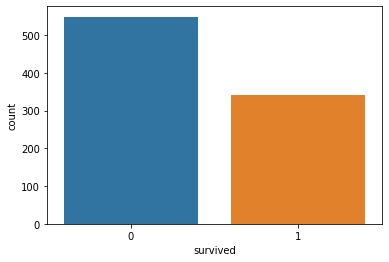

In [13]:
sns.countplot(titanic['survived']) #to have an overview of survied and not survied passangers

In [14]:
df= titanic[['sex','embarked','class','who','parch','sibsp']]

df.columns


Index(['sex', 'embarked', 'class', 'who', 'parch', 'sibsp'], dtype='object')

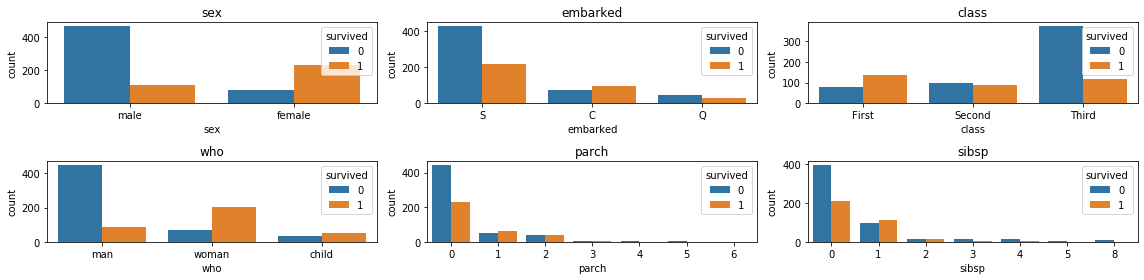

In [15]:
df= df[['sex','embarked','class','who','parch','sibsp']]
col=df.columns
index=0
rows=2
cols=3
fig, ax= plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))

for i in range(rows):
    for j in range(cols):
        sns.countplot(df[col[index]],hue=titanic['survived'], ax=ax[i][j])
        ax[i][j].set_title(col[index])
        ax[i][j].legend(title='survived',loc='upper right')
        index=index+1
plt.tight_layout()

#0-not survived 1-survived

In [16]:
titanic.groupby('sex')[['survived']].mean() # this table shows the percentage of the survied passangers of male and female

,survived
sex,
female,0.742038
male,0.188908


In [17]:
titanic.pivot_table('survived', index=('sex'),columns='class') # this pivot table indicate that the percentage of people survived in the respective classes

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


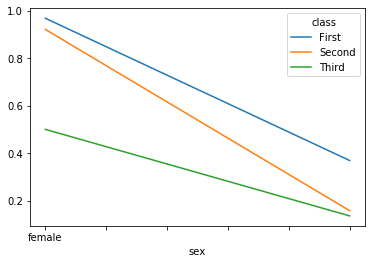

In [18]:
titanic.pivot_table('survived', index='sex',columns='class').plot()  # this graphs shows the plot of the above pivot table

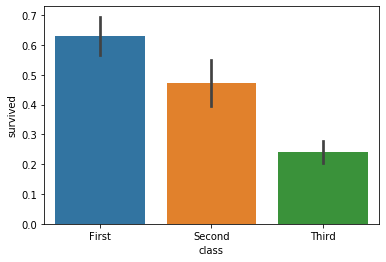

In [19]:
sns.barplot(x='class',y='survived',data=titanic)

In [20]:
age=pd.cut(titanic['age'],[0,18,30,50,80])
titanic.pivot_table('survived',index=('sex',age), columns= 'class') 

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 50]  0.972973  0.925926  0.272727
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 50]  0.448980  0.114286  0.126761
       (50, 80]  0.192308  0.083333  0.000000

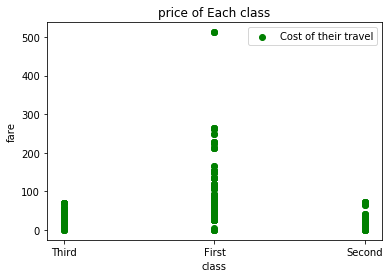

In [21]:
plt.scatter(titanic['class'],titanic['fare'], color='green',label='Cost of their travel')
plt.ylabel('fare')
plt.xlabel('class')
plt.title('price of Each class')
plt.legend()
plt.show()

In [22]:
#Drop the columns
titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1)
#drop nan values from the rows
titanic=titanic.dropna(subset=['age','embarked'])

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
titanic.shape

(712, 8)

In [25]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
titanic['sex']=labelencoder.fit_transform(titanic['sex'].values)
titanic['embarked']=labelencoder.fit_transform(titanic['embarked'].values)

In [27]:
titanic.head() #after droping the columns

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [28]:
X=titanic.drop(['survived'], axis=1)
y=titanic['survived']

In [29]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [30]:
X.shape,y.shape

((712, 7), (712,))

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler  # Making every column mean as 0 as standard deviation 1, so that every feature has same scale
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [34]:
from sklearn.model_selection import GridSearchCV     #performing grid search for KNN best parameters
from sklearn.neighbors import KNeighborsClassifier
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
tuned_parameters=[{'n_neighbors': neighbors}]
model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'f1', cv=10)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
0.7394957983193277


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters=[{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model_1 = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_1.fit(X_train, y_train)

print(model_1.best_estimator_)
print(model_1.score(X_test, y_test))


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7636363636363637


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
tuned_parameters=[{'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
      'C':[10**-4, 10**-2, 10**0, 10**2, 10**4],
      'degree':np.arange(3,6),   
      'coef0':np.arange(0.001,3,0.5),
      'gamma': ('auto', 'scale')}]

model_2 = GridSearchCV(SVC(), tuned_parameters, scoring = 'f1', cv=5)
model_2.fit(X_train, y_train)

print(model_2.best_estimator_)
print(model_2.score(X_test, y_test))

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

tuned_parameters=[{'n_estimators':(10,30,50,70,90,100),
      'criterion':('gini','entropy'),
      'max_depth':(3,5,7,9,10),   
      'max_features':('auto','sqrt'),
      'min_samples_split': (2,4,6)}]

model_3 = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False), tuned_parameters, scoring = 'f1', cv=5)
model_3.fit(X_train, y_train)

print(model_3.best_estimator_)
print(model_3.score(X_test, y_test))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7796610169491526


In [45]:
def models(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(C=1,random_state=0)
    log.fit(X_train,y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=27, metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,y_train)
    
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,y_train)
    
    print('[0]Logistic Regression Training Accuracy:',log.score(X_train,y_train))
    print('[1]K Neighbors Training Accuracy:',knn.score(X_train,y_train))
    print('[2]SVC Linear Training Accuracy:',svc_lin.score(X_train,y_train))
    print('[3]SVC RBF Training Accuracy:',svc_rbf.score(X_train,y_train))
    print('[4]Gaussian NB Training Accuracy:',gauss.score(X_train,y_train))
    print('[5]Decision Tree Training Accuracy:',tree.score(X_train,y_train))
    print('[6]Random Forest Training Accuracy:',forest.score(X_train,y_train))
    
    model=[log,knn,svc_lin,svc_rbf,gauss,tree,forest]
    return model
    

In [44]:
model=models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Neighbors Training Accuracy: 0.8137082601054482
[2]SVC Linear Training Accuracy: 0.7768014059753954
[3]SVC RBF Training Accuracy: 0.8506151142355008
[4]Gaussian NB Training Accuracy: 0.8031634446397188
[5]Decision Tree Training Accuracy: 0.9929701230228472
[6]Random Forest Training Accuracy: 0.9753954305799648


In [110]:
def plot_confusion_matrix(test_y,predict_y):
    C=confusion_matrix(test_y,predict_y)#Binary Confusion Matrix
    A=(((C.T)/(C.sum(axis=1))).T)#Recall Matrix
    B=(C/C.sum(axis=0))#Precision Matrix
    
    plt.figure(figsize=(20,4))
    labels=[0,1]
    
    cmap=sns.light_palette('blue')
    plt.subplot(1,3,1)
    sns.heatmap(C,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Confusion matrix [0:not survived, 1:survived]')
    
    plt.subplot(1,3,2)
    sns.heatmap(B,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Precision matrix [0:not survived, 1:survived]')
    
    plt.subplot(1,3,3)
    sns.heatmap(A,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Recall matrix [0:not survived, 1:survived]')
    
    plt.show()

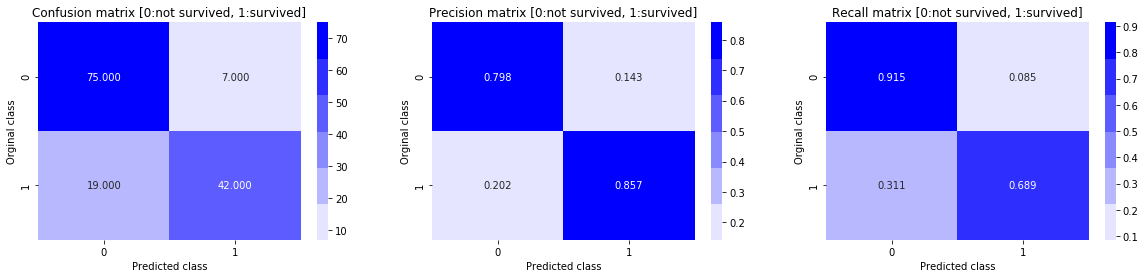

Model[0] testing accuracy="0.8181818181818182"


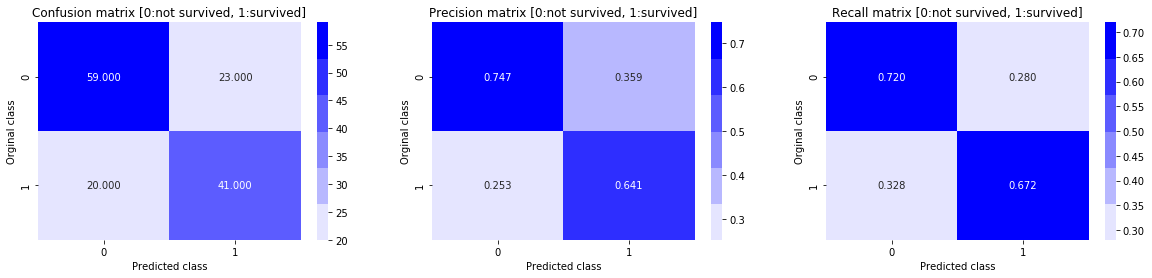

Model[1] testing accuracy="0.6993006993006993"


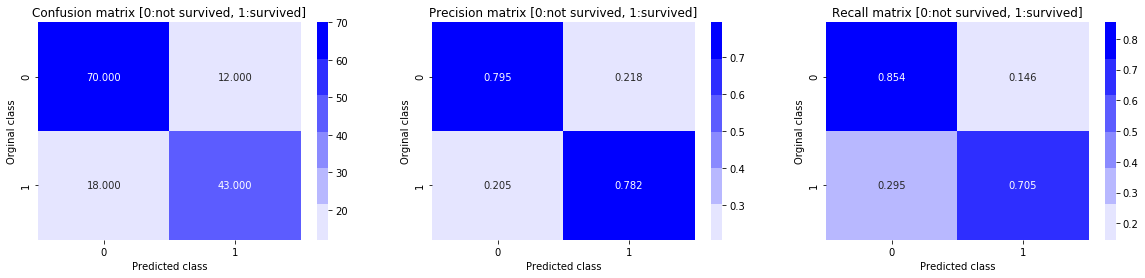

Model[2] testing accuracy="0.7902097902097902"


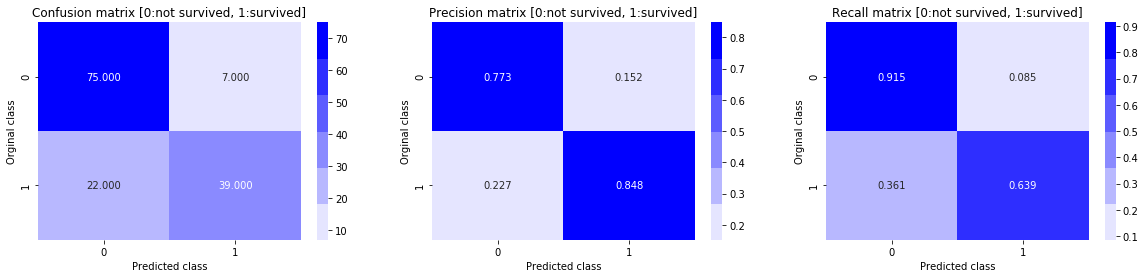

Model[3] testing accuracy="0.7972027972027972"


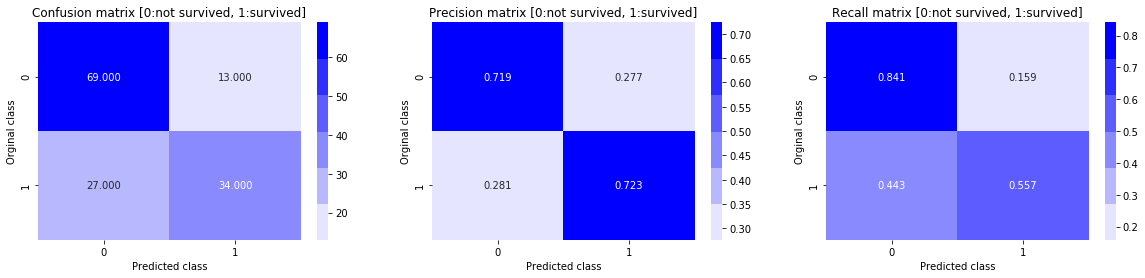

Model[4] testing accuracy="0.7202797202797203"


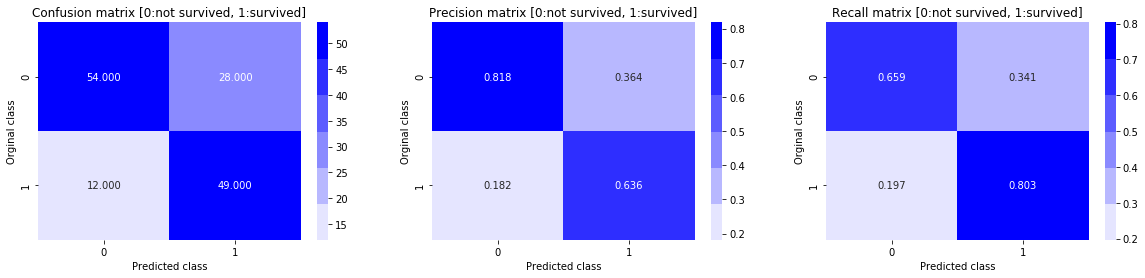

Model[5] testing accuracy="0.7202797202797203"


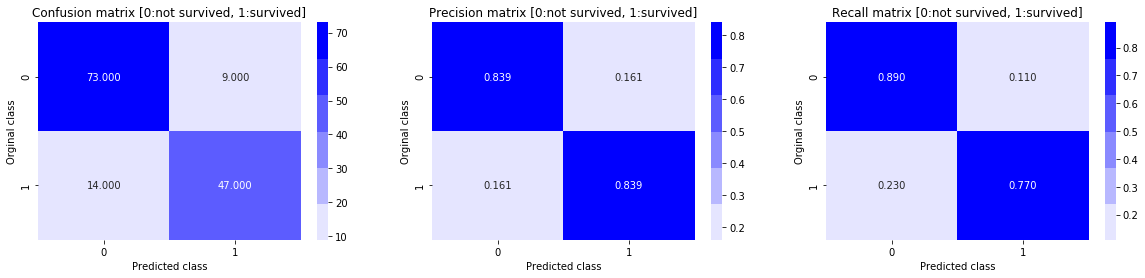

Model[6] testing accuracy="0.8391608391608392"


In [111]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm=plot_confusion_matrix(y_test,model[i].predict(X_test))
    
    TN,FP,FN,TP=confusion_matrix(y_test,model[i].predict(X_test)).ravel()
    
    test_score=(TP+TN)/(TP+TN+FN+FP)
    
    
    print('Model[{}] testing accuracy="{}"'.format(i,test_score))
    

In [48]:
#As Random forest yeilds highest test accuracy of all model, therefore we are getting the feature importance of that model
importances=pd.DataFrame({'feature':X.columns,'importance':np.round(model[6].feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


In [49]:
for i in range(len(model)): # this shows feature importance for predictimg the model from the given dataset
    i=i+5
    if i==7:
        break
    print(model[i])
    importances=pd.DataFrame({'feature':X.columns,'importance':np.round(model[i].feature_importances_,3)})
    importances=importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    
        
        

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
          importance
feature             
age            0.268
fare           0.265
sex            0.216
pclass         0.136
sibsp          0.067
embarked       0.032
parch          0.016
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_we

In [50]:
# to predict the survival rate
Age=int(input('Enter the age of the passanger:'))
Fare=float(input('Enter the fair of passanger ticket:'))
Sex= str(input('Enter the sex of the passanger:(Male or Female)'))
if str.lower(Sex) == 'male' or str.lower(Sex)=='m':
    Sex=1
elif str.lower(Sex) == 'female' or str.lower(Sex)=='f':
    Sex=0
else:
    Sex =print('Enter the correct gender')
    
Pclass=int(input('Enter the passanger class:(either 1, 2, 3)'))
sibsp=int(input('Enter the number of the siblings and spouse:'))  
parch=int(input('Enter number of parentes and children passanger has:'))
embarked=str(input('Enter the city they have boarded from:'))
if str.lower(embarked) == 'cherbourg'or str.lower(embarked)=='c':
    embarked=1
elif str.lower(embarked) == 'queenstown' or str.lower(embarked)=='q':
    embarked=0 
elif str.lower(embarked)=='southampton' or str.lower(embarked)=='s':
    embarked=2
else:
    embarked=print('Enter the correct place')





Enter the age of the passanger:45
Enter the fair of passanger ticket:356
Enter the sex of the passanger:(Male or Female)m
Enter the passanger class:(either 1, 2, 3)1
Enter the number of the siblings and spouse:0
Enter number of parentes and children passanger has:0
Enter the city they have boarded from:s


In [51]:
survival=[[Age,Fare,Sex,Pclass,sibsp,parch,embarked]]
survival

[[45, 356.0, 1, 1, 0, 0, 2]]

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
survival_scaled=sc.fit_transform(survival)

pred=model[6].predict(survival_scaled)
print(pred)

if pred==0:
    print('You did not make it')
else:
    print('You survived')


[0]
You did not make it
